In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dataset = pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv',header = 1)

In [12]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [13]:
dataset.shape

(246, 14)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### **Data Cleaning**

In [15]:
## Missing values
dataset[dataset.isnull().any(axis= 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN



The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [16]:
dataset.loc[:122,"Region"] = 0

dataset.loc[122:,"Region"] = 1

df = dataset

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [19]:
df[['Region']]  = df[['Region']].astype('int')

In [20]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [21]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [22]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [23]:
### Removing the Null values
df = df.dropna().reset_index(drop =  True)


In [24]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [25]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [26]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [27]:
df = df.drop(122).reset_index(drop = True)

In [28]:
df.iloc[[122]] ### now they became the numerical

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [29]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [30]:
## Fix Spaces in the Columns Names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


### **Change the Requried Columns as intger data type**

In [32]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [33]:

df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype('int32')

In [34]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int32(6), int64(1), object(8)
memory usage: 22.9+ KB


### **changing the other columns to the Data type float**


In [35]:
## generic wat to write code


objects = [features for features in df.columns if df[features].dtypes == 'O']

In [36]:
####obj = df.select_dtypes(include = 'object') # Pass a list of dtypes to exclude

In [37]:
###obj.columns

In [38]:
for i in objects:
  if i!='Classes':
    df[i] = df[i].astype('float32')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float32
 7   FFMC         243 non-null    float32
 8   DMC          243 non-null    float32
 9   DC           243 non-null    float32
 10  ISI          243 non-null    float32
 11  BUI          243 non-null    float32
 12  FWI          243 non-null    float32
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float32(7), int32(6), int64(1), object(1)
memory usage: 16.3+ KB


In [40]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.699997,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.400002,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.099998,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.600000,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.800003,3.0,14.2,1.2,3.9,0.5,not fire,0


In [41]:
### Lets' s Save the Cleaned Dataset
df.to_csv('Algerian_forest_fires_Cleaned_dataset_1.csv',index = False)


### **Exploratory** **Data** **Analysis**

In [42]:

#drop day,month,year columns
df_copy= df.drop(['day','month','year'],axis = 1)

In [43]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.699997,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.400002,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.099998,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.600000,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.800003,3.0,14.2,1.2,3.9,0.5,not fire,0


In [44]:

## Categories in classes

df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [45]:
## Encoding the Catgorices in Columns


## Removing the Spaces in the coulms data with

#===>  str.contains('not fire')

df_copy['Classes']  = np.where( df_copy['Classes'].str.contains('not fire'),0,1)

In [46]:
df_copy.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.699997,3.4,7.600000,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.400002,4.1,7.600000,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.099998,2.5,7.100000,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.600000,1.3,6.900000,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.800003,3.0,14.200000,1.2,3.9,0.5,0,0
5,31,67,14,0.0,82.599998,5.8,22.200001,3.1,7.0,2.5,1,0
6,33,54,13,0.0,88.199997,9.9,30.500000,6.4,10.9,7.2,1,0
7,30,73,15,0.0,86.599998,12.1,38.299999,5.6,13.5,7.1,1,0
8,25,88,13,0.2,52.900002,7.9,38.799999,0.4,10.5,0.3,0,0
9,28,79,12,0.0,73.199997,9.5,46.299999,1.3,12.6,0.9,0,0


In [47]:
df_copy.tail(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
233,35,34,17,0.0,92.199997,23.6,97.300003,13.8,29.400000,21.6,1,1
234,33,64,13,0.0,88.900002,26.1,106.300003,7.1,32.400002,13.7,1,1
235,35,56,14,0.0,89.000000,29.4,115.599998,7.5,36.000000,15.2,1,1
236,26,49,6,2.0,61.299999,11.9,28.100000,0.6,11.900000,0.4,0,1
237,28,70,15,0.0,79.900002,13.8,36.099998,2.4,14.100000,3.0,0,1
238,30,65,14,0.0,85.400002,16.0,44.500000,4.5,16.900000,6.5,1,1
239,28,87,15,4.4,41.099998,6.5,8.000000,0.1,6.200000,0.0,0,1
240,27,87,29,0.5,45.900002,3.5,7.900000,0.4,3.400000,0.2,0,1
241,24,54,18,0.1,79.699997,4.3,15.200000,1.7,5.100000,0.7,0,1
242,24,64,15,0.2,67.300003,3.8,16.500000,1.2,4.800000,0.5,0,1


In [48]:



df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

<ipython-input-49-432a5c199339>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


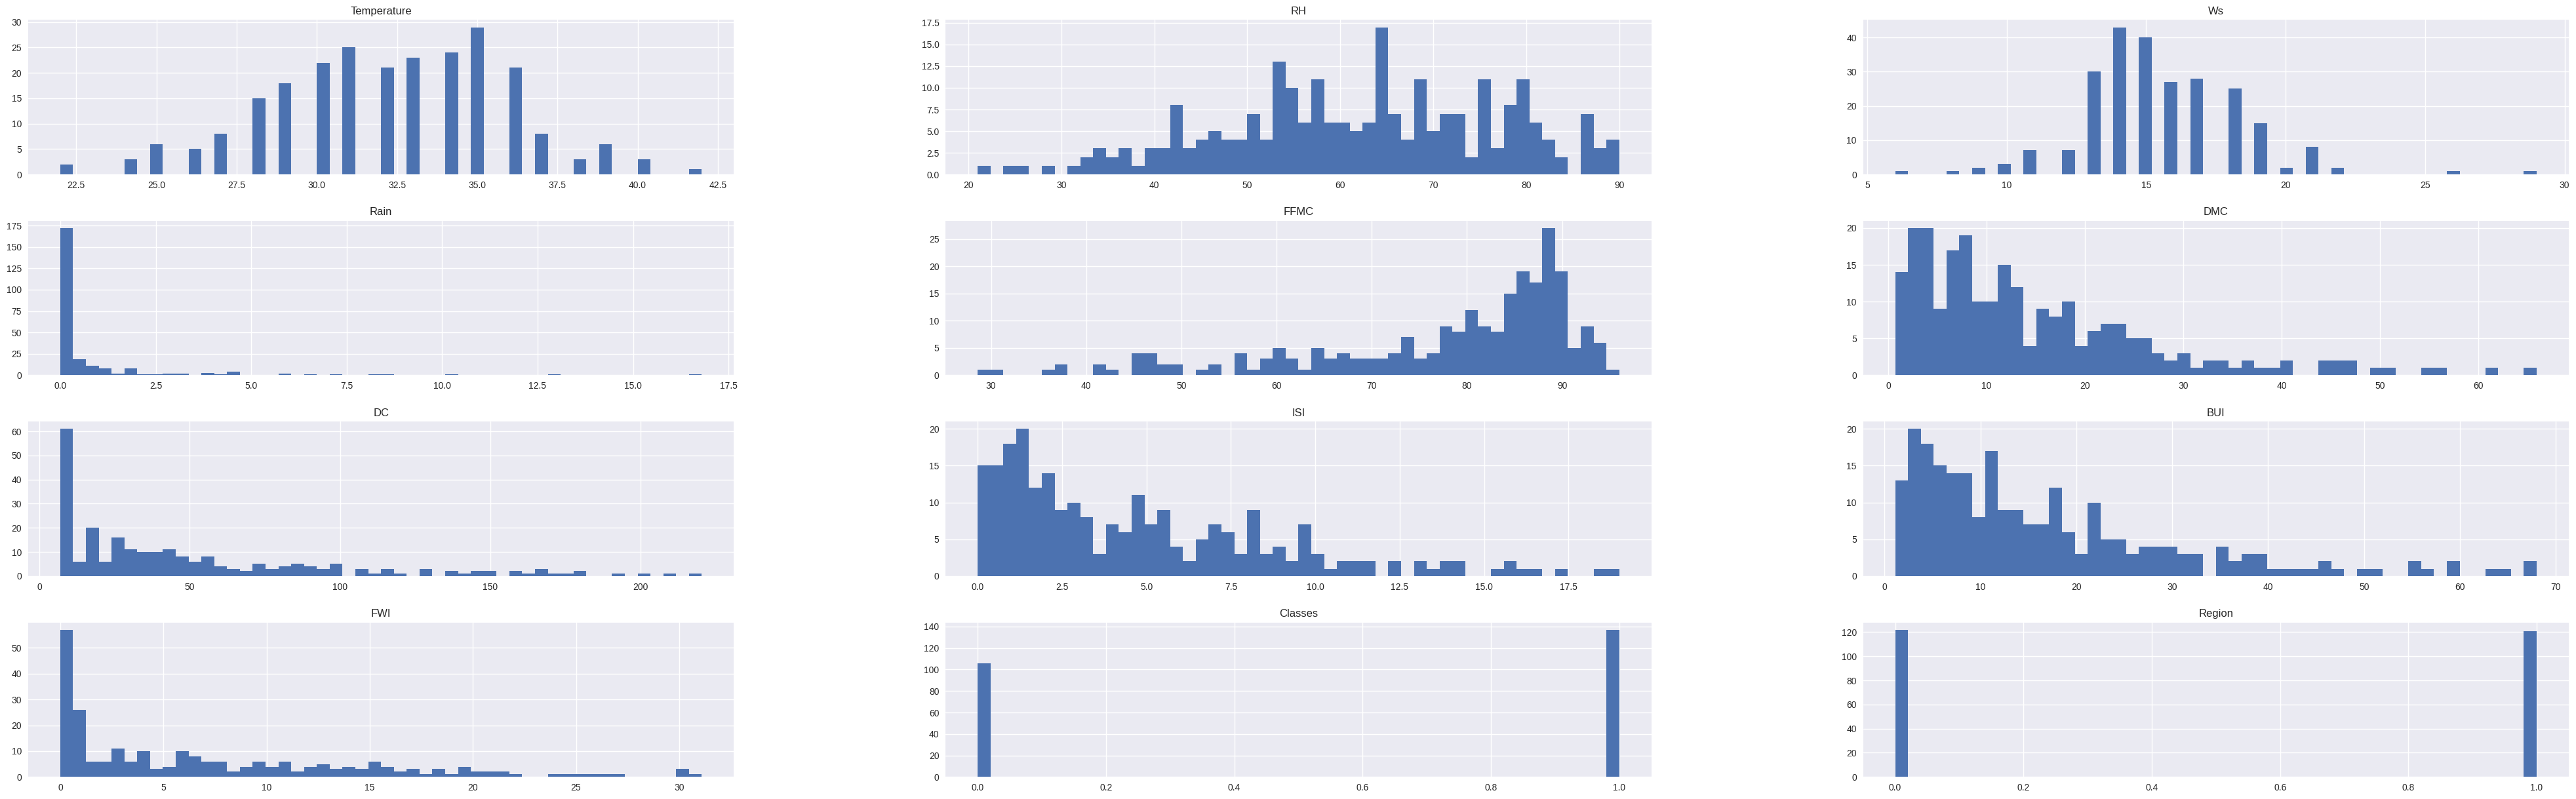

In [49]:
### Plot Density Plot For All Features
plt.style.use('seaborn')
df_copy.hist(bins = 50,figsize = (50,15))
plt.show()

In [50]:
## Percentage for pie-chart
## 1-> Fire
## 0 -> not fire
df_copy['Classes'].value_counts(normalize = True) * 100

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

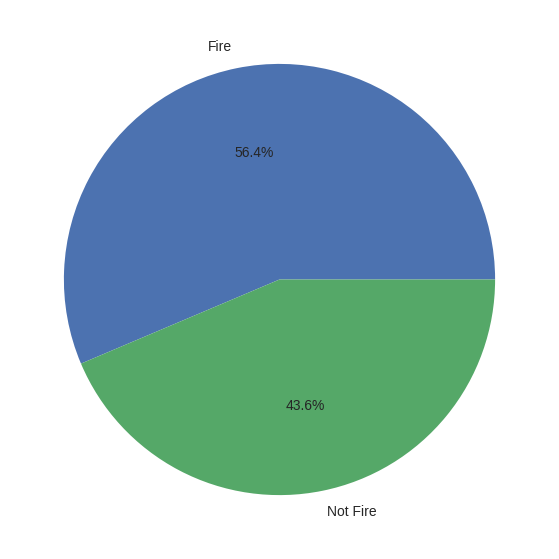

In [51]:
## Plotting Pie-Chart
classlabels = ['Fire','Not Fire']
plt.figure(figsize = (12,7))
plt.pie(df_copy['Classes'].value_counts(normalize = True) * 100,labels = classlabels,autopct = '%1.1f%%')
plt.show()

In [52]:
### Corelation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


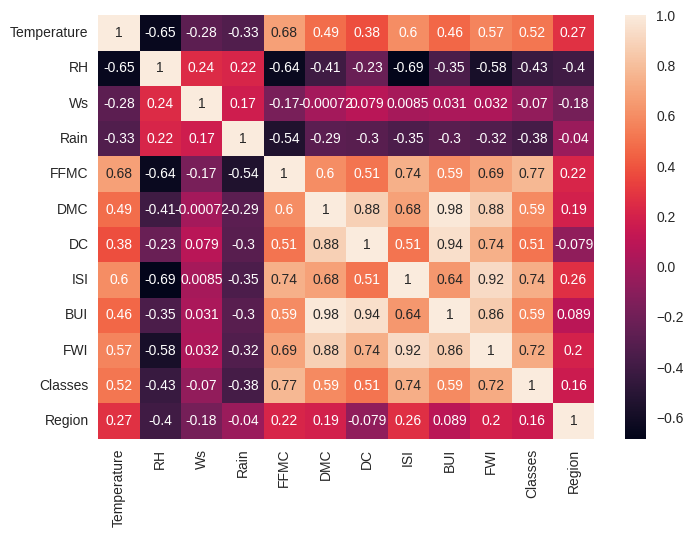

In [53]:
sns.heatmap(df_copy.corr(),annot = True)
plt.show()

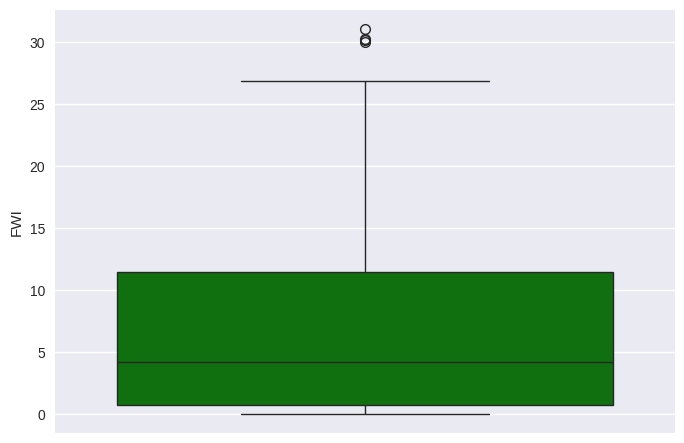

In [54]:
### Box plot
sns.boxplot(df_copy['FWI'],color = 'g')
plt.show()

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

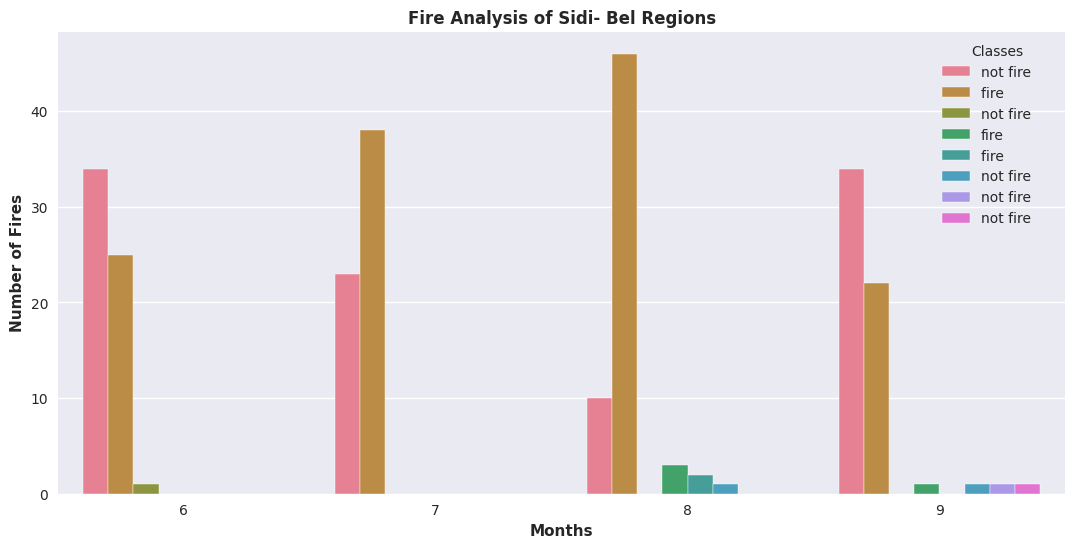

In [55]:

## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

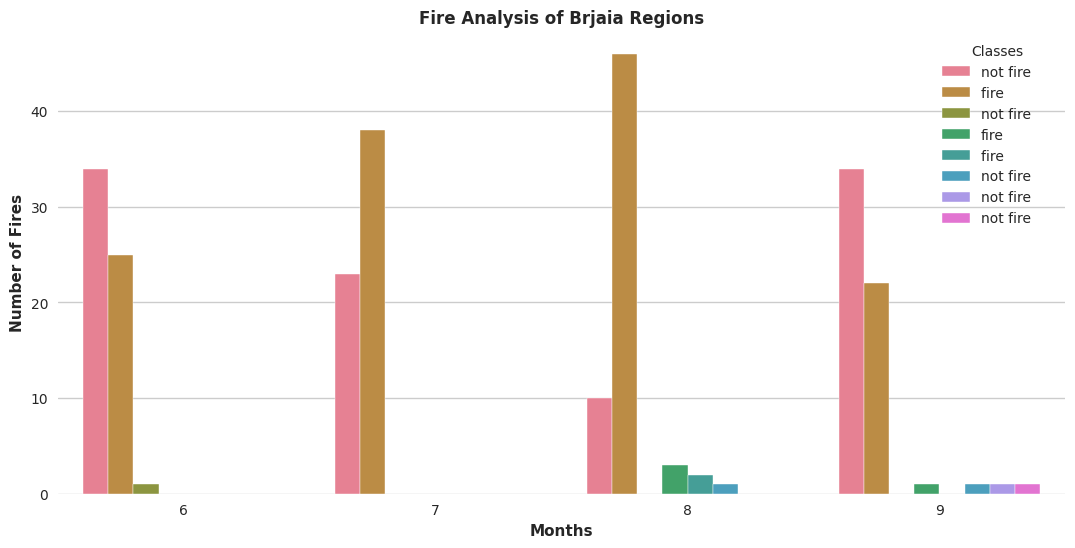

In [56]:

## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')


Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on Septembe

# **Model Training**

In [57]:
## import libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


In [58]:
df = pd.read_csv('/content/3.Algerian_forest_fires_cleaned_dataset(Ride,lasso,elastic).csv')

In [59]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [60]:
### Drop the Months , day and year

df.drop(columns = ['day','month','year'],axis = 1,inplace = True)

In [61]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [62]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [63]:
### Encoding the
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [64]:
df.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [65]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [66]:
### Independent And Dependent Features
X = df.drop('FWI',axis = 1)

y = df['FWI']

In [67]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [68]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [69]:
### Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [70]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [71]:
## Feature Slection based on co-relatiom

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


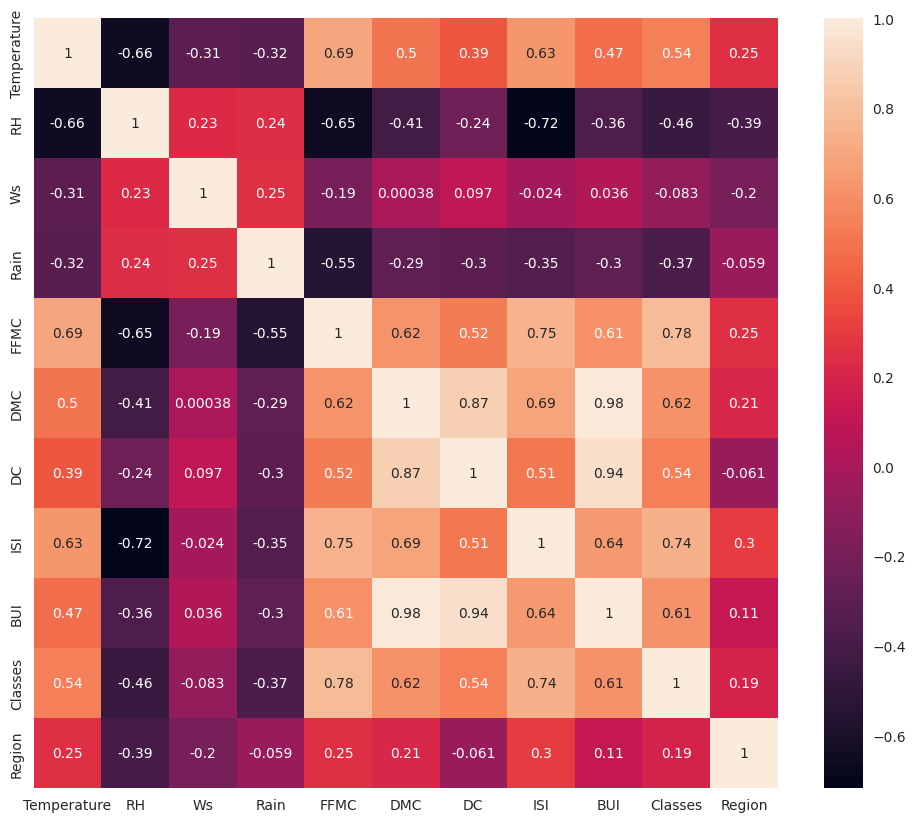

In [72]:
## Check the Multi -collinearity

plt.figure(figsize = (12,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [73]:
def correlation(dataset,threshold):
  col_corr = set()
  corrmat = dataset.corr()
  for i in range(len(corrmat.columns)):
    for j in range(i):
      if abs(corrmat.iloc[i,j]) > threshold:
        colname = corrmat.columns[i]
        col_corr.add(colname)
  return col_corr


In [74]:
#Threshold - - Domain Expertise

corr_features = correlation(X_train,0.85)

In [75]:
### Drop Features  when correlation is more than 0.85

X_train.drop(corr_features,axis = 1,inplace = True)
X_test.drop(corr_features,axis = 1,inplace = True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## **Feature Scaling Or Standardization**

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [77]:

## Fit_transform the X_train data
X_train_scaled = scaler.fit_transform(X_train)

## transform the X_test data
X_test_scaled = scaler.transform(X_test)

In [78]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

<ipython-input-79-5f80783a5da1>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<Axes: title={'center': 'X_train After Scaling'}>

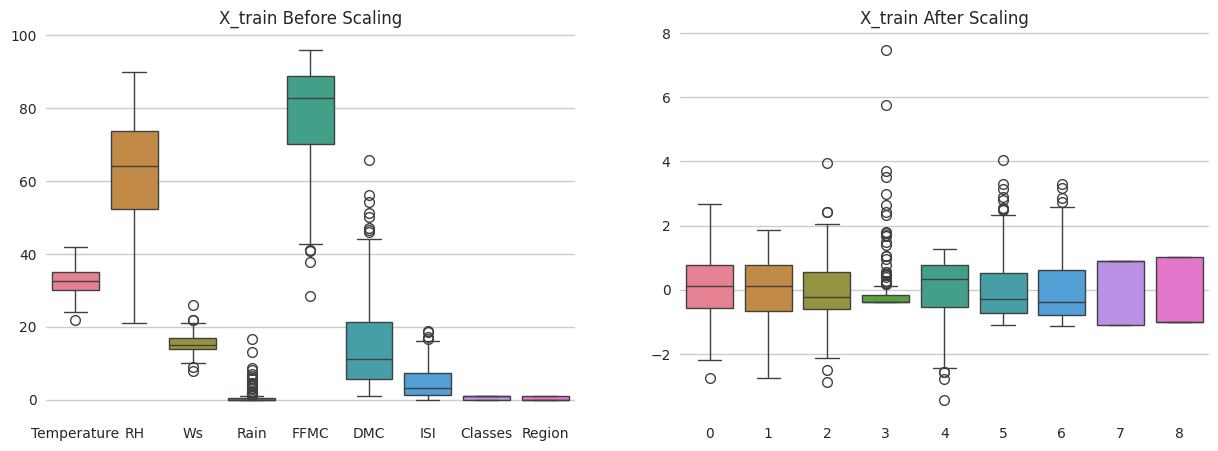

In [79]:
### Boxplot to understand Effect of Standard Scaler

plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title ('X_train Before Scaling')
plt.subplot(1,2,2)
plt.title ('X_train After Scaling')
sns.boxplot(X_train_scaled)


## **Linear Regression**

In [80]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.metrics import mean_absolute_error

In [81]:
lin_reg = LinearRegression()

In [82]:
lin_reg.fit(X_train_scaled,y_train)

LinearRegression()

In [83]:
y_pred = lin_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


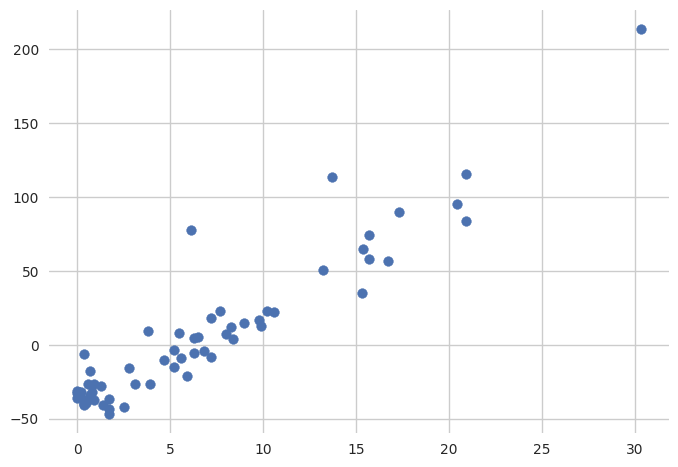

In [84]:
plt.scatter(y_test,y_pred)

In [85]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("Meam Absolue Error:- ",mae)
print("Mean Squared Error:- ",mse)
print("Root Mean Squared Error:- ",rmse)

Meam Absolue Error:-  32.63239756717759
Mean Squared Error:-  1935.7542850900918
Root Mean Squared Error:-  43.997207696512874


## **Lasso Regression**

In [86]:
## Lasso reg
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [87]:
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)


In [88]:
mar = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [92]:
print("MSE :- ",mse)
print("MAE :- ",mar)
print("RMSE :- ",rmse)
print("r2_score:-",r2_score(y_test,y_pred))

MSE :-  2.2483458918974772
MAE :-  1.133175994914409
RMSE :-  1.4994485292591664
r2_score:- 0.9492020263112388


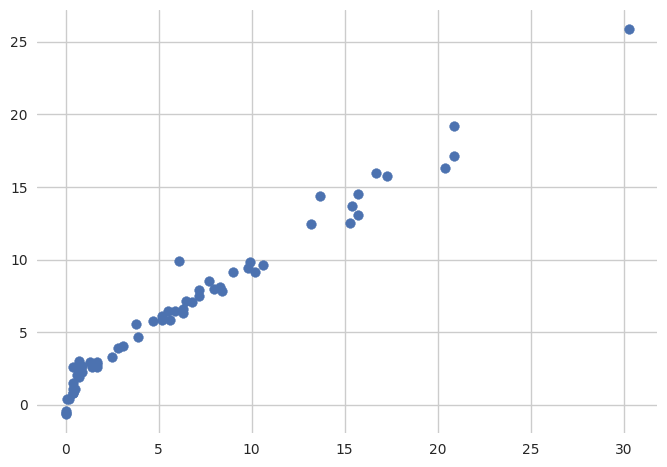

In [90]:
plt.scatter(y_test,y_pred)
plt.show()

### **Cross Validation LAsso**

In [103]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled,y_train)



LassoCV(cv=5)

In [104]:
lassocv.alpha_

0.05725391318234411

In [105]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [106]:
len(lassocv.mse_path_)

100

In [108]:
y_pred = lassocv.predict(X_test_scaled)

In [109]:
## Print the Metrics
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [111]:
print("Mse:-",mse)
print("mae:-",mae)
print("rmse:-",rmse)
print("r2:-",r2)

Mse:- 0.7924995554743627
mae:- 0.6199701158263433
rmse:- 0.8902244410677358
r2:- 0.9820946715928275


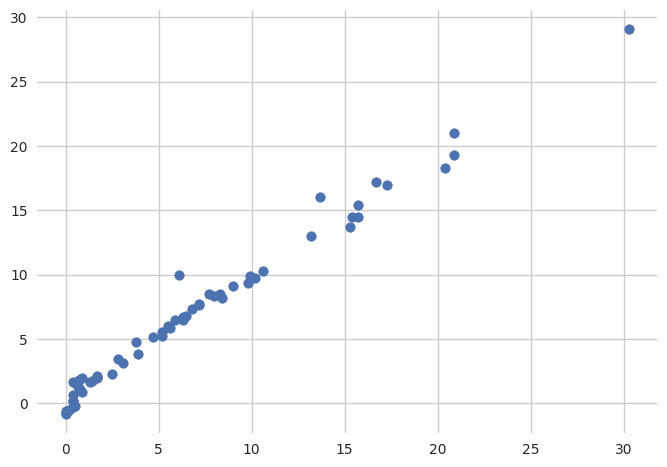

In [112]:
plt.scatter(y_test,y_pred)
plt.show()

## **Ridge Regression**

In [93]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)

In [94]:
## Print the Metrics
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [97]:
print("Mse:-",mse)
print("mae:-",mae)
print("rmse:-",rmse)
print("r2:-",r2)

Mse:- 0.6949198918152074
mae:- 0.5642305340105692
rmse:- 0.8336185529456548
r2:- 0.9842993364555513


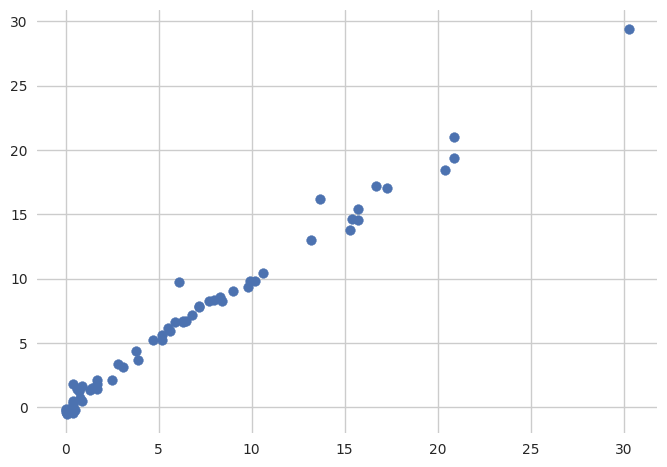

In [95]:
plt.scatter(y_test,y_pred)
plt.show()

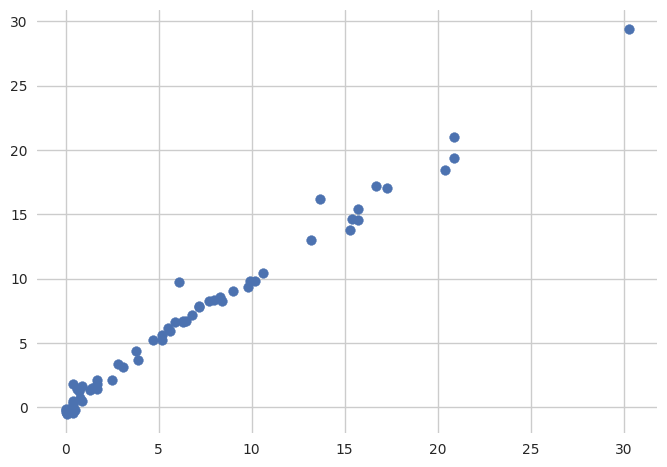

In [114]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.show()

In [115]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [116]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

In [118]:
ridgecv.set_params

<bound method BaseEstimator.set_params of RidgeCV(cv=5)>

### **Elastic Regression**

In [96]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)

In [98]:
## Print the Metrics
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [99]:
print("Mse:-",mse)
print("mae:-",mae)
print("rmse:-",rmse)
print("r2:-",r2)

Mse:- 5.5172511010252245
mae:- 1.8822353634896005
rmse:- 2.3488829474933874
r2:- 0.8753460589519703


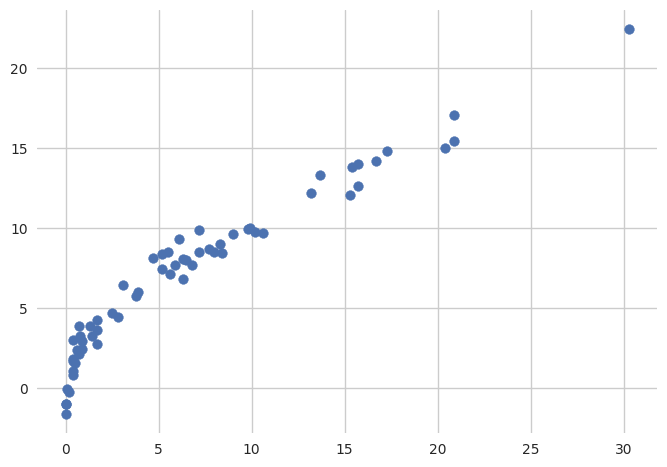

In [100]:
plt.scatter(y_test,y_pred)
plt.show()

In [119]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv = 5)
elasticcv.fit(X_train_scaled,y_train)

ElasticNetCV(cv=5)